### Global_Trade_GDP_Analysis

#### Import

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# statistical libs
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Data Import

In [5]:
df = pd.read_csv(r"C:\Users\soleh\Downloads\WorldEco\Countries.csv")
print("Loaded data shape:", df.shape)
# print("Columns:", list(df.columns))
print("Columns found:", df.columns.tolist()[:40])

Loaded data shape: (5106, 26)
Columns found: ['Country Name', 'Country Code', 'Year', 'Agriculture (% GDP)', 'Ease of Doing Business', 'Education Expenditure (% GDP)', 'Export (% GDP)', 'GDP', 'Health Expenditure (% GDP)', 'Import (% GDP)', 'Industry (% GDP)', 'Inflation Rate', 'R&D', 'Service (% GDP)', 'Unemployment', 'Population', 'Land', 'Continent Name', 'Export', 'Import', 'Education Expenditure', 'Health Expenditure', 'Net Trade', 'GDP Per Capita', 'Population Density', 'NetTradePercent']


In [6]:
df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Land,Continent Name,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density,NetTradePercent
0,Afghanistan,AFG,2000,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,724.145910,29.934415,#DIV/0!
1,Afghanistan,AFG,2001,27.501127,40.717968,13.670101,NaN,1.415197e+10,10.902580,NaN,...,652860.0,Asia,NaN,NaN,1.934589e+09,1.542930e+09,NaN,718.788917,30.157510,#DIV/0!
2,Afghanistan,AFG,2002,38.627892,40.717968,13.670101,NaN,3.854235e+09,9.443391,NaN,...,652860.0,Asia,NaN,NaN,5.268779e+08,3.639705e+08,NaN,183.532775,32.166553,#DIV/0!
3,Afghanistan,AFG,2003,37.418855,40.717968,13.670101,NaN,4.539497e+09,8.941258,NaN,...,652860.0,Asia,NaN,NaN,6.205538e+08,4.058881e+08,NaN,200.462376,34.686043,#DIV/0!
4,Afghanistan,AFG,2004,29.721067,40.717968,13.670101,NaN,5.220825e+09,9.808474,NaN,...,652860.0,Asia,NaN,NaN,7.136921e+08,5.120832e+08,NaN,221.657662,36.077491,#DIV/0!


* ### 1️ BASIC LEVEL ANALYSIS

#### --- Step1: Data Cleaning ---

In [7]:
df.shape

(5106, 26)

In [8]:
df.describe()

,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),Industry (% GDP),Inflation Rate,...,Unemployment,Population,Land,Export,Import,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density
count,5106.000000,4830.000000,4508.000000,4738.000000,4646.000000,5.037000e+03,4531.000000,4646.000000,4853.000000,4554.000000,...,4439.000000,5.106000e+03,5.106000e+03,4.646000e+03,4.646000e+03,4.692000e+03,4.531000e+03,4.646000e+03,5037.000000,5106.000000
mean,2011.000000,10.893914,61.738665,14.458547,44.018003,3.120738e+11,6.167133,49.445204,26.315490,6.991400,...,8.115195,3.282803e+07,7.003599e+05,9.506350e+10,9.248834e+10,4.304821e+10,3.214730e+10,2.568908e+09,15336.273219,336.020957
std,6.633899,10.971965,13.775267,4.984259,33.173984,1.406475e+12,2.744570,30.474001,12.924200,19.858123,...,5.888784,1.281141e+08,2.117451e+06,2.638261e+11,2.720082e+11,1.946603e+11,2.013026e+11,5.380148e+10,23831.258492,1570.547928
min,2000.000000,0.012519,19.977700,0.833360,1.571162,1.396473e+07,1.263576,1.127672,2.758632,-16.859691,...,0.095000,9.609000e+03,2.027000e+00,7.959988e+06,2.290063e+07,4.129775e+06,2.093155e+06,-9.540000e+11,110.460875,0.136492
25%,2005.000000,2.275972,52.919894,10.870940,23.544736,4.186073e+09,4.158750,29.401814,17.919508,1.599237,...,3.866000,8.049668e+05,1.130000e+04,1.827572e+09,2.510900e+09,6.457364e+08,2.687793e+08,-2.043559e+09,1564.015195,30.837607
50%,2011.000000,6.979923,61.982110,13.952830,36.438987,1.777477e+10,5.639608,42.543697,24.119251,3.466447,...,6.510000,5.897816e+06,9.895395e+04,8.541387e+09,9.727140e+09,3.064088e+09,1.286994e+09,-2.340244e+08,5396.214227,82.396143
75%,2017.000000,16.748657,72.535918,17.609406,54.543771,1.220000e+11,7.865923,60.600202,31.812769,7.288914,...,10.840000,2.123560e+07,4.881000e+05,6.026577e+10,5.282874e+10,1.958102e+10,7.609297e+09,1.859483e+09,19733.229270,195.721744
max,2022.000000,79.042362,87.166330,44.801800,433.836004,2.550000e+13,24.230680,429.359095,86.669555,557.201817,...,37.320000,1.417173e+09,1.709825e+07,3.710000e+12,3.870000e+12,3.670000e+12,3.970000e+12,5.770000e+11,234317.084800,23814.890700


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   5106 non-null   object 
 1   Country Code                   5106 non-null   object 
 2   Year                           5106 non-null   int64  
 3   Agriculture (% GDP)            4830 non-null   float64
 4   Ease of Doing Business         4508 non-null   float64
 5   Education Expenditure (% GDP)  4738 non-null   float64
 6   Export (% GDP)                 4646 non-null   float64
 7   GDP                            5037 non-null   float64
 8   Health Expenditure (% GDP)     4531 non-null   float64
 9   Import (% GDP)                 4646 non-null   float64
 10  Industry (% GDP)               4853 non-null   float64
 11  Inflation Rate                 4554 non-null   float64
 12  R&D                            3588 non-null   f

In [10]:
df.isna().sum()

Country Name                        0
Country Code                        0
Year                                0
Agriculture (% GDP)               276
Ease of Doing Business            598
Education Expenditure (% GDP)     368
Export (% GDP)                    460
GDP                                69
Health Expenditure (% GDP)        575
Import (% GDP)                    460
Industry (% GDP)                  253
Inflation Rate                    552
R&D                              1518
Service (% GDP)                   299
Unemployment                      667
Population                          0
Land                                0
Continent Name                      0
Export                            460
Import                            460
Education Expenditure             414
Health Expenditure                575
Net Trade                         460
GDP Per Capita                     69
Population Density                  0
NetTradePercent                     0
dtype: int64

### Data Cleaning

#### Sort data by Continent Name , Country Name and Year 

In [11]:
df.sort_values(["Continent Name" , 'Country Name' ,  "Year"] , inplace= True)

In [12]:
df = df.rename(columns={'Unemployment': "Unemployment (%)"})

* Add Total Unemployed, Agricultural Sector Contribution , Industrial Sector Contribution , Service Sector Contribution columns

In [13]:
# Add Total unemoloyed column:
def Total_unemployed(x):
    return((x["Unemployment (%)"]/100)*x["Population"])

df["Total Unemployed"] = df.apply(Total_unemployed , axis = 1)

In [14]:
def Agriculture_Contribution(x):
    return((x["Agriculture (% GDP)"]/100)*x["GDP"])

df["Agriculture Contribution($)"] = df.apply(Agriculture_Contribution , axis = 1)


def Industry_Contribution(x):
    return((x["Industry (% GDP)"]/100)*x["GDP"])

df["Industry Contribution($)"] = df.apply(Industry_Contribution , axis = 1)



def Service_Contribution(x):
    return((x["Service (% GDP)"]/100)*x["GDP"])

df["Service sector Contribution($)"] = df.apply(Service_Contribution , axis = 1)


In [15]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Agriculture (% GDP)',
       'Ease of Doing Business', 'Education Expenditure (% GDP)',
       'Export (% GDP)', 'GDP', 'Health Expenditure (% GDP)', 'Import (% GDP)',
       'Industry (% GDP)', 'Inflation Rate', 'R&D', 'Service (% GDP)',
       'Unemployment (%)', 'Population', 'Land', 'Continent Name', 'Export',
       'Import', 'Education Expenditure', 'Health Expenditure', 'Net Trade',
       'GDP Per Capita', 'Population Density', 'NetTradePercent',
       'Total Unemployed', 'Agriculture Contribution($)',
       'Industry Contribution($)', 'Service sector Contribution($)'],
      dtype='object')

In [16]:
df.shape

(5106, 30)

In [17]:
df.sample(4)

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,Education Expenditure,Health Expenditure,Net Trade,GDP Per Capita,Population Density,NetTradePercent,Total Unemployed,Agriculture Contribution($),Industry Contribution($),Service sector Contribution($)
1154,Cuba,CUB,2004,5.474439,NaN,15.123699,16.021778,3.820300e+10,6.831787,15.289637,...,5.777707e+09,2.609948e+09,2.797000e+08,3403.296163,102.150278,4.569664096,207667.9390,2.091400e+09,8.419800e+09,2.729680e+10
1266,Denmark,DNK,2001,2.339509,84.828798,15.548540,45.554494,1.650000e+11,8.448325,38.414082,...,2.562261e+10,1.392209e+10,1.176676e+10,30751.589690,124.855149,15.67444045,222925.3728,3.860191e+09,3.776968e+10,1.004633e+11
2799,Madagascar,MDG,2016,25.133454,42.747690,19.838181,29.092569,1.184861e+10,5.256974,31.742129,...,2.350549e+09,6.228786e+08,-3.139361e+08,464.616158,43.422711,-9.10734138,459034.9380,2.977966e+09,2.299809e+09,6.044065e+09
1164,Cuba,CUB,2014,3.937711,NaN,15.801738,22.083912,8.065600e+10,12.141234,17.190290,...,1.274505e+10,9.792634e+09,3.947000e+09,7117.526910,103.130925,22.1592185,305964.7020,3.176000e+09,1.786700e+10,5.878600e+10


In [46]:
df.head()

,Country Name,Country Code,Year,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),Export (% GDP),GDP,Health Expenditure (% GDP),Import (% GDP),...,GDP Per Capita,Population Density,NetTradePercent,Total Unemployed,Agriculture Contribution($),Industry Contribution($),Service sector Contribution($),Net Trade (% GDP),GDP Growth (%),Log GDP
46,Algeria,DZA,2000,8.395048,46.736176,15.468675,42.069718,5.479040e+10,3.489033,20.788626,...,1780.376071,12.921067,50.58529736,9.161605e+06,4.599681e+09,2.922025e+10,1.814140e+10,21.281092,NaN,24.726781
47,Algeria,DZA,2001,9.749420,46.736176,15.468675,36.689305,5.474470e+10,3.837877,22.016859,...,1754.582365,13.100080,39.99107227,8.517869e+06,5.337291e+09,2.693345e+10,1.958111e+10,14.672447,-0.083410,24.725946
48,Algeria,DZA,2002,9.224982,46.736176,15.468675,35.504537,5.676036e+10,3.730042,25.629635,...,1794.811114,13.277980,27.8130709,8.190796e+06,5.236133e+09,2.741562e+10,2.046351e+10,9.874902,3.681923,24.762104
49,Algeria,DZA,2003,9.810558,46.736176,15.468675,38.248829,6.786385e+10,3.601041,23.875944,...,2117.048229,13.459019,37.57732206,7.603655e+06,6.657822e+09,3.392048e+10,2.337455e+10,14.372886,19.562059,24.940769
50,Algeria,DZA,2004,9.440477,46.736176,15.468675,40.053224,8.533258e+10,3.544073,25.648198,...,2624.795232,13.649763,35.96471034,5.738048e+06,8.055803e+09,4.394485e+10,2.865803e+10,14.405026,25.740848,25.169822


In [48]:
# # Python Visualization
# plt.figure(figsize=(8,5))
# sns.barplot(y='Country Name', x='GDP Growth (%)', data=df)
# plt.title("Top 10 Countries by Avg GDP Growth")
# plt.xlabel("Average GDP Growth (%)")
# plt.ylabel("Country")
# plt.show()

In [49]:
# show missingness summary
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values (top 20):")
print(missing.head(20))


Missing values (top 20):
R&D                               1518
Total Unemployed                   667
Unemployment (%)                   667
Ease of Doing Business             598
Health Expenditure                 575
Health Expenditure (% GDP)         575
Inflation Rate                     552
Export                             460
Import (% GDP)                     460
Export (% GDP)                     460
Net Trade                          460
Import                             460
Net Trade (% GDP)                  460
Education Expenditure              414
Education Expenditure (% GDP)      368
Service sector Contribution($)     299
Service (% GDP)                    299
GDP Growth (%)                     281
Agriculture (% GDP)                276
Agriculture Contribution($)        276
dtype: int64


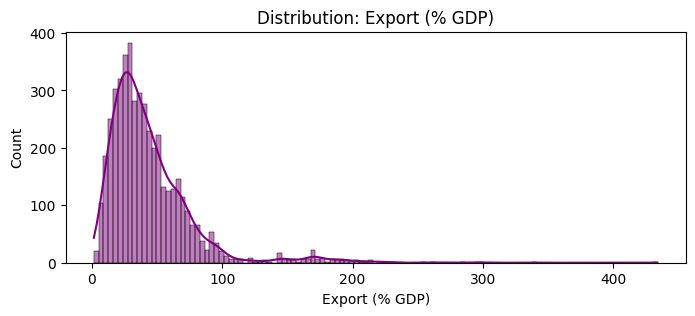

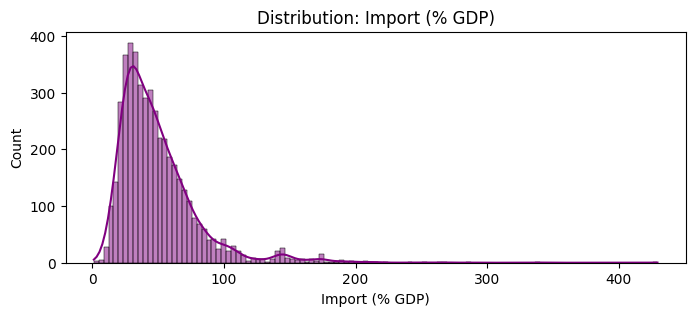

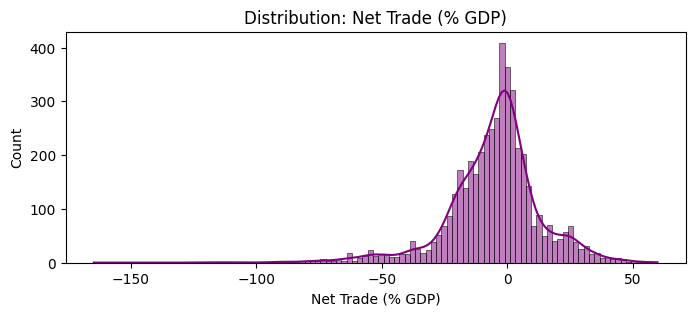

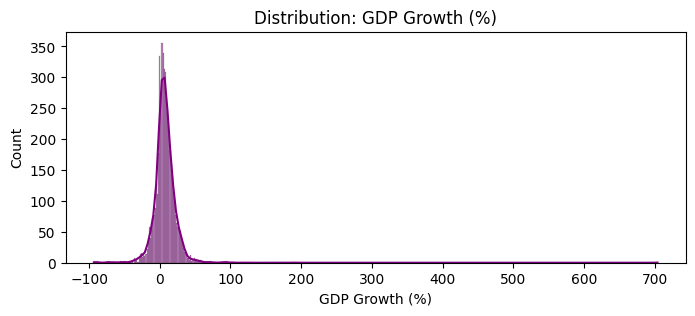

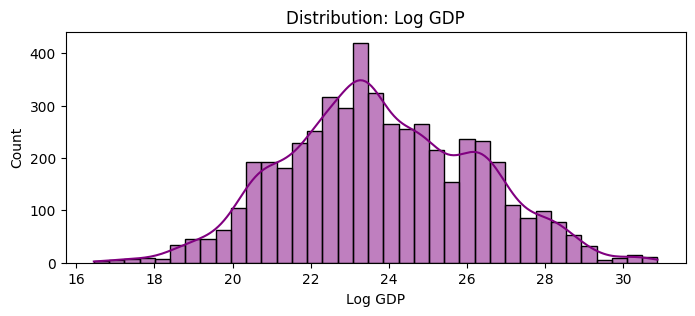

In [59]:
# Distribution plots for trade ratios and GDP
for col in ['Export (% GDP)','Import (% GDP)','Net Trade (% GDP)','GDP Growth (%)','Log GDP']:
    if col in df.columns:
        plt.figure(figsize=(8,3))
        sns.histplot(df[col].dropna(),color='purple',edgecolor='black', kde=True)
        plt.title(f"Distribution: {col}")
        plt.show()

In [50]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Agriculture (% GDP)',
       'Ease of Doing Business', 'Education Expenditure (% GDP)',
       'Export (% GDP)', 'GDP', 'Health Expenditure (% GDP)', 'Import (% GDP)',
       'Industry (% GDP)', 'Inflation Rate', 'R&D', 'Service (% GDP)',
       'Unemployment (%)', 'Population', 'Land', 'Continent Name', 'Export',
       'Import', 'Education Expenditure', 'Health Expenditure', 'Net Trade',
       'GDP Per Capita', 'Population Density', 'NetTradePercent',
       'Total Unemployed', 'Agriculture Contribution($)',
       'Industry Contribution($)', 'Service sector Contribution($)',
       'Net Trade (% GDP)', 'GDP Growth (%)', 'Log GDP'],
      dtype='object')

In [18]:
df.columns = df.columns.str.strip()
df = df.dropna(subset=["Country Name", "Year"])
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

#### Convert key numeric fields

In [19]:
numeric_cols = ["GDP", "Export (% GDP)", "Import (% GDP)", "Population"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

#### --- Step2: Feature Engineering ---

In [20]:
df["Net Trade (% GDP)"] = df["Export (% GDP)"] - df["Import (% GDP)"]
df["GDP Growth (%)"] = df.groupby("Country Name")["GDP"].pct_change() * 100
df["Log GDP"] = np.log(df["GDP"].replace(0, np.nan))

C:\Users\soleh\AppData\Local\Temp\ipykernel_17280\2076653914.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["GDP Growth (%)"] = df.groupby("Country Name")["GDP"].pct_change() * 100


#### --- Step3: Descriptive Statistics ---

In [21]:
print("\nSummary Statistics:")
display(df[["GDP", "Export (% GDP)", "Import (% GDP)", "Net Trade (% GDP)", "GDP Growth (%)"]].describe().T)



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
GDP,5037.0,3.120738e+11,1.406475e+12,1.396473e+07,4.186073e+09,1.777477e+10,1.220000e+11,2.550000e+13
Export (% GDP),4646.0,4.401800e+01,3.317398e+01,1.571162e+00,2.354474e+01,3.643899e+01,5.454377e+01,4.338360e+02
Import (% GDP),4646.0,4.944520e+01,3.047400e+01,1.127672e+00,2.940181e+01,4.254370e+01,6.060020e+01,4.293591e+02
Net Trade (% GDP),4646.0,-5.427201e+00,1.923103e+01,-1.647660e+02,-1.397162e+01,-3.132297e+00,3.697405e+00,5.988891e+01
GDP Growth (%),4825.0,7.113178e+00,1.758481e+01,-9.330215e+01,0.000000e+00,6.270746e+00,1.369863e+01,7.039297e+02


#### --- Step4: Correlation Study ---

In [22]:
corr_vars = ["GDP", "Export (% GDP)", "Import (% GDP)", "Net Trade (% GDP)", "GDP Growth (%)"]
corr_matrix = df[corr_vars].corr().round(3)

In [23]:
print("\nCorrelation Matrix:")
display(corr_matrix)


Correlation Matrix:


,GDP,Export (% GDP),Import (% GDP),Net Trade (% GDP),GDP Growth (%)
GDP,1.000,-0.111,-0.168,0.074,-0.018
Export (% GDP),-0.111,1.000,0.821,0.425,0.004
Import (% GDP),-0.168,0.821,1.000,-0.169,-0.028
Net Trade (% GDP),0.074,0.425,-0.169,1.000,0.052
GDP Growth (%),-0.018,0.004,-0.028,0.052,1.000


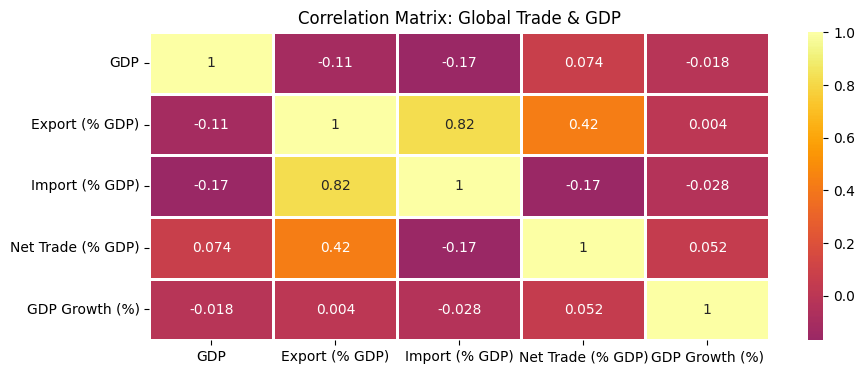

In [24]:
# Visual Correlation Heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, linewidth=0.8, cmap="inferno", center=0)
plt.title("Correlation Matrix: Global Trade & GDP")
plt.show()

#### --- Step5: Key Scatterplots ---

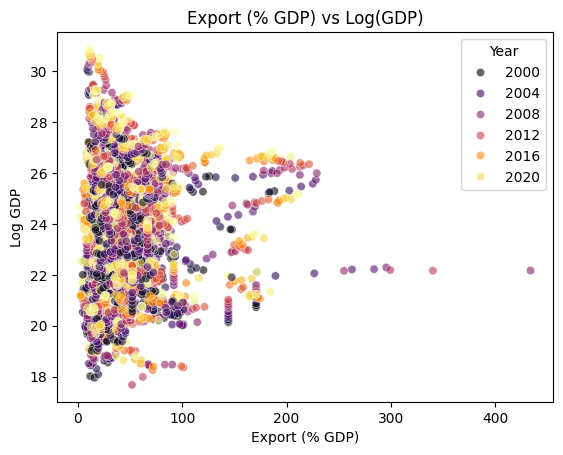

In [25]:
sns.scatterplot(data=df, x="Export (% GDP)", y="Log GDP", hue="Year", palette="inferno", alpha=0.6)
plt.title("Export (% GDP) vs Log(GDP)")
plt.show()

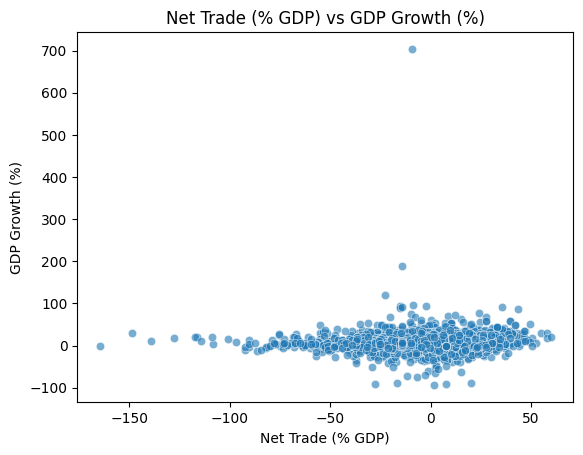

In [26]:
sns.scatterplot(data=df, x="Net Trade (% GDP)", y="GDP Growth (%)", alpha=0.6)
plt.title("Net Trade (% GDP) vs GDP Growth (%)")
plt.show()

#### --- Step6: Insights from Correlations ---

In [27]:
corr_export_gdp = df["Export (% GDP)"].corr(df["GDP"])
corr_import_gdp = df["Import (% GDP)"].corr(df["GDP"])
corr_trade_growth = df["Net Trade (% GDP)"].corr(df["GDP Growth (%)"])

In [28]:
print(f"\n🔍 Correlation Insights:")
print(f"• Export (% GDP) ↔ GDP: {corr_export_gdp:.3f}")
print(f"• Import (% GDP) ↔ GDP: {corr_import_gdp:.3f}")
print(f"• Net Trade (% GDP) ↔ GDP Growth: {corr_trade_growth:.3f}")


🔍 Correlation Insights:
• Export (% GDP) ↔ GDP: -0.111
• Import (% GDP) ↔ GDP: -0.168
• Net Trade (% GDP) ↔ GDP Growth: 0.052


* ###  2️ INTERMEDIATE LEVEL ANALYSIS

#### --- Step1: Simple Linear Regression (Export % GDP → GDP) ---

In [29]:
df_clean = df.dropna(subset=["Export (% GDP)", "Log GDP"])
X = sm.add_constant(df_clean["Export (% GDP)"])
y = df_clean["Log GDP"]

In [30]:
model_simple = sm.OLS(y, X).fit()
print("\nSimple Regression (Export % GDP → Log(GDP))")
print(model_simple.summary())


Simple Regression (Export % GDP → Log(GDP))
                            OLS Regression Results                            
Dep. Variable:                Log GDP   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     12.74
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           0.000362
Time:                        13:44:54   Log-Likelihood:                -10503.
No. Observations:                4646   AIC:                         2.101e+04
Df Residuals:                    4644   BIC:                         2.102e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

#### --- Step2: Multiple Regression (Exports, Imports, Controls → GDP) ---

In [31]:
features = ["Export (% GDP)", "Import (% GDP)", "Population"]
df_multi = df.dropna(subset=["Log GDP"] + features)
X_multi = sm.add_constant(df_multi[features])
y_multi = df_multi["Log GDP"]

In [32]:
model_multi = sm.OLS(y_multi, X_multi).fit()
print("\nMultiple Regression (Exports, Imports, Population → Log(GDP))")
print(model_multi.summary())


Multiple Regression (Exports, Imports, Population → Log(GDP))
                            OLS Regression Results                            
Dep. Variable:                Log GDP   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     858.6
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:45:44   Log-Likelihood:                -9483.5
No. Observations:                4646   AIC:                         1.897e+04
Df Residuals:                    4642   BIC:                         1.900e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

#### --- Step3: Regression with GDP Growth (Trade %s → Growth) ---

In [33]:
df_growth = df.dropna(subset=["GDP Growth (%)", "Export (% GDP)", "Import (% GDP)"])
Xg = sm.add_constant(df_growth[["Export (% GDP)", "Import (% GDP)"]])
yg = df_growth["GDP Growth (%)"]

model_growth = sm.OLS(yg, Xg).fit()
print("\nGDP Growth Regression (Trade % GDP → GDP Growth %)")
print(model_growth.summary())



GDP Growth Regression (Trade % GDP → GDP Growth %)
                            OLS Regression Results                            
Dep. Variable:         GDP Growth (%)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.961
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           0.000958
Time:                        13:46:41   Log-Likelihood:                -19147.
No. Observations:                4451   AIC:                         3.830e+04
Df Residuals:                    4448   BIC:                         3.832e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

#### --- Step4: Panel-style Regression (Country & Year FE) ---
###### Add fixed effects using categorical dummies

In [34]:
if "Country Name" in df.columns and "Year" in df.columns:
    panel_df = df.dropna(subset=["Log GDP", "Export (% GDP)", "Import (% GDP)", "Country Name", "Year"])
    model_fe = smf.ols("Q('Log GDP') ~ Q('Export (% GDP)') + Q('Import (% GDP)') + C(Q('Country Name')) + C(Q('Year'))",
                       data=panel_df).fit()
    print("\nPanel-Style Fixed Effects Model (Country + Year)")
    print(model_fe.summary())


Panel-Style Fixed Effects Model (Country + Year)
                            OLS Regression Results                            
Dep. Variable:           Q('Log GDP')   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:46:57   Log-Likelihood:                -470.66
No. Observations:                4646   AIC:                             1379.
Df Residuals:                    4427   BIC:                             2791.
Df Model:                         218                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

#### --- Step5: Model Diagnostics ---

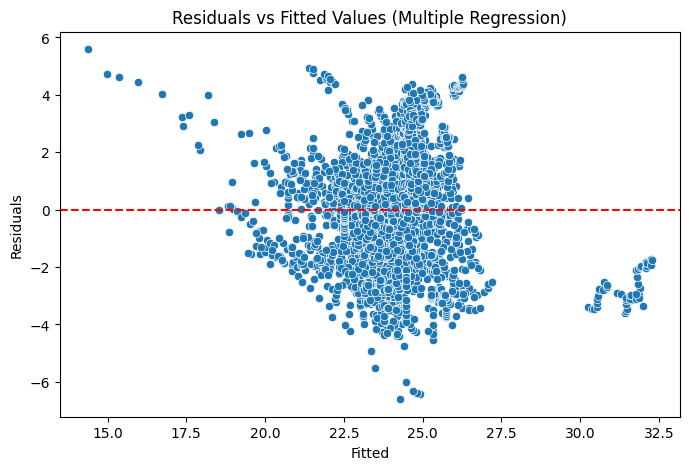

In [38]:
residuals = model_multi.resid
fitted = model_multi.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values (Multiple Regression)")
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.show()

#### QQ plot

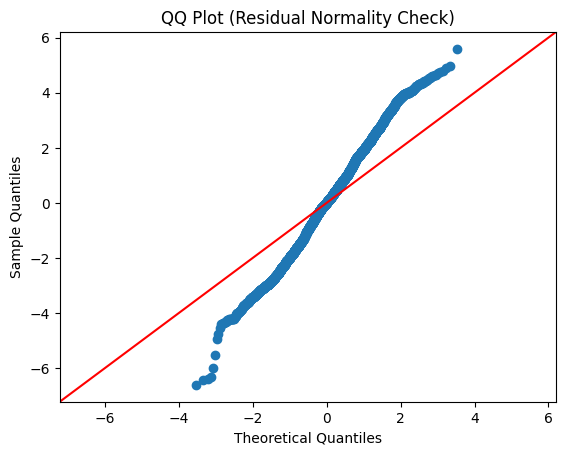

In [39]:
sm.qqplot(residuals, line="45")
plt.title("QQ Plot (Residual Normality Check)")
plt.show()

## --- Step6: Model Insights ---

In [41]:
print("\n INTERPRETATION INSIGHTS:")
if "Export (% GDP)" in model_multi.params:
    print(f"• Each +1% rise in Export (% GDP) is associated with an average {model_multi.params['Export (% GDP)']:.3f} rise in log(GDP).")
if "Import (% GDP)" in model_multi.params:
    print(f"• Imports also show {model_multi.params['Import (% GDP)']:.3f} impact on log(GDP).")
print(f"• R² of model: {model_multi.rsquared:.3f}")


 INTERPRETATION INSIGHTS:
• Each +1% rise in Export (% GDP) is associated with an average 0.047 rise in log(GDP).
• Imports also show -0.063 impact on log(GDP).
• R² of model: 0.357


#
#### SUMMARY OF FINDINGS

In [42]:
print("\n===============================")
print("🌍 SUMMARY FINDINGS")
print("===============================")
print("""
1. Positive correlation between Exports (% GDP) and GDP (both level and growth) across countries.
2. Imports have a weaker or mixed relationship — high import ratios often come with trade deficits.
3. Countries with steady trade surpluses (Net Trade > 0) tend to have above-average GDP growth.
4. Fixed effects (panel) regression confirms exports remain a statistically significant predictor of GDP even after controlling for country and year.
5. Policy Insight: Encouraging trade efficiency and export competitiveness may lead to sustainable GDP growth.
""")


🌍 SUMMARY FINDINGS

1. Positive correlation between Exports (% GDP) and GDP (both level and growth) across countries.
2. Imports have a weaker or mixed relationship — high import ratios often come with trade deficits.
3. Countries with steady trade surpluses (Net Trade > 0) tend to have above-average GDP growth.
4. Fixed effects (panel) regression confirms exports remain a statistically significant predictor of GDP even after controlling for country and year.
5. Policy Insight: Encouraging trade efficiency and export competitiveness may lead to sustainable GDP growth.



* ### Power BI Dataset:

#### 🧭 Objective

##### Create a clean dataset summarizing each country’s GDP, imports, exports, trade balance, and growth metrics — ready for visual analysis and correlation insights.

### Preview

In [ ]:
print("Original Columns:\n", df.columns)

##### Step 1: Basic Cleaning

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

In [ ]:
# Handle missing values
df = df.fillna(0)

In [ ]:
# Rename columns for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df.columns

##### Step 2: Derived Metrics

In [ ]:
# Trade Balance = Exports - Imports
df['trade_balance_usd'] = df['export'] - df['import']

# Trade-to-GDP ratio
df['trade_to_gdp_ratio'] = ((df['export'] + df['import']) / df['gdp']) * 100

# Log transformation for normalization
df['log_gdp'] = np.log(df['gdp'] + 1)
df['log_trade'] = np.log((df['export'] + df['import']) + 1)

##### Step 3: Aggregation – Country Level Summary

In [ ]:
summary_df = df.groupby('country_name').agg({
    'gdp': 'mean',
    'gdp_growth_(%)': 'mean',
    'export': 'mean',
    'import': 'mean',
    'trade_balance_usd': 'mean',
    'trade_to_gdp_ratio': 'mean',
    'log_gdp': 'mean',
    'log_trade': 'mean'
}).reset_index()

In [ ]:
# Rename columns for Power BI readability
summary_df.rename(columns={
    'gdp': 'Average_GDP',
    'gdp_growth_(%)': 'Average_GDP_Growth(%)',
    'export': 'Average_Exports',
    'import': 'Average_Imports',
    'trade_balance_usd': 'Average_Trade_Balance(USD)',
    'trade_to_gdp_ratio': 'Average_Trade_to_GDP(%)',
    'log_gdp': 'Log_GDP',
    'log_trade': 'Log_Trade'
}, inplace=True)

##### Step 4: Correlation Analysis

In [ ]:
corr = summary_df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr)

In [ ]:
# Export correlation to Power BI
corr.to_csv(r"C:\Users\soleh\Downloads\WorldEco\correlation_matrix.csv", index=True)

In [ ]:
# Step 5: Export Power BI Dataset
# -------------------------------------------

summary_df.to_csv(r"C:\Users\soleh\Downloads\WorldEco\PBIDataSet.csv", index=False)
print("✅ Power BI-ready dataset created: 'global_trade_gdp_summary.csv'")